In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [22]:
# Load data
run_data = pd.read_csv('data/run_data.csv', index_col=0)
for col in ('history', 'config'):
    run_data[col] = run_data[col].apply(lambda x: eval(x.replace('nan', 'np.nan')))

# Baseline Plots

In [23]:
# Baseline sweep id: y7aa3sos
baseline_sids = ['y7aa3sos', '28yx4jad']
baseline_data = run_data[run_data['sweep'].apply(lambda x: x in baseline_sids)]

# Create a dataframe for baseline data in an easily graphable format
baseline_data = {
    'env': baseline_data['config'].apply(lambda x: x['env']),
    'task_agent': baseline_data['config'].apply(lambda x: x['task_agent']),
    'steps': baseline_data['history'].apply(lambda x: x['env_task_step'] if 'env_task_step' in x else np.nan),
    'rewards': baseline_data['history'].apply(lambda x: x['env_task_episode_reward'] if 'env_task_episode_reward' in x else np.nan),
    'run_name': baseline_data['name']
}
baseline_df = pd.DataFrame(baseline_data)

# Expand the dataframe to include on entry per step
expanded_dfs = []
for i, row in baseline_df.iterrows():
    timesteps = len(row['steps'])
    expanded_df = pd.DataFrame({
        'env': [row['env']] * timesteps,
        'task_agent': [row['task_agent']] * timesteps,
        'run_name': [row['run_name']] * timesteps,
        'step': row['steps'].values(),
        'reward': row['rewards'].values()})
    expanded_dfs.append(expanded_df)

baseline_df = pd.concat(expanded_dfs)
baseline_df.head()

,env,task_agent,run_name,step,reward
0,CrazyClimberNoFrameskip-v4,PPO,snowy-sweep-6,2973,8700
1,CrazyClimberNoFrameskip-v4,PPO,snowy-sweep-6,4799,6800
2,CrazyClimberNoFrameskip-v4,PPO,snowy-sweep-6,8298,11000
3,CrazyClimberNoFrameskip-v4,PPO,snowy-sweep-6,13680,11000
4,CrazyClimberNoFrameskip-v4,PPO,snowy-sweep-6,16500,11000


In [24]:
env_dfs = {}
for env, env_data in baseline_df.groupby('env'):
    # Interpolate data from each run for graphing
    all_steps = env_data['step'].unique()
    interp_dfs = []
    for run_name, run_data in env_data.groupby('run_name'):
        interp_data = []
        run_steps = set(run_data['step'])
        for step in all_steps:
            if step not in run_steps:
                interp_data.append({
                    'env': env,
                    'run_name': run_name,
                    'task_agent': run_data['task_agent'].iloc[0],
                    'step': step,
                    'reward': np.nan})
        interp_df = pd.DataFrame(interp_data)
        interp_df = pd.concat([interp_df, run_data])
        interp_df = interp_df.sort_values('step')
        interp_df['reward'] = interp_df['reward'].interpolate(limit_direction='forward')
        interp_dfs.append(interp_df)
    
    interp_env_df = pd.concat(interp_dfs).reset_index()
    env_dfs[env] = interp_env_df

KeyboardInterrupt: 

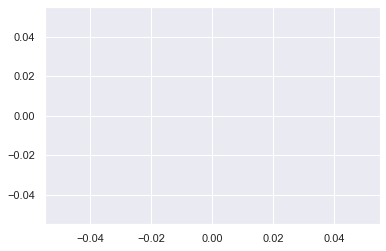

In [31]:
for env, df in env_dfs.items():
    sns.lineplot(data=df, x='step', y='reward', hue='task_agent', ci=95)
    break

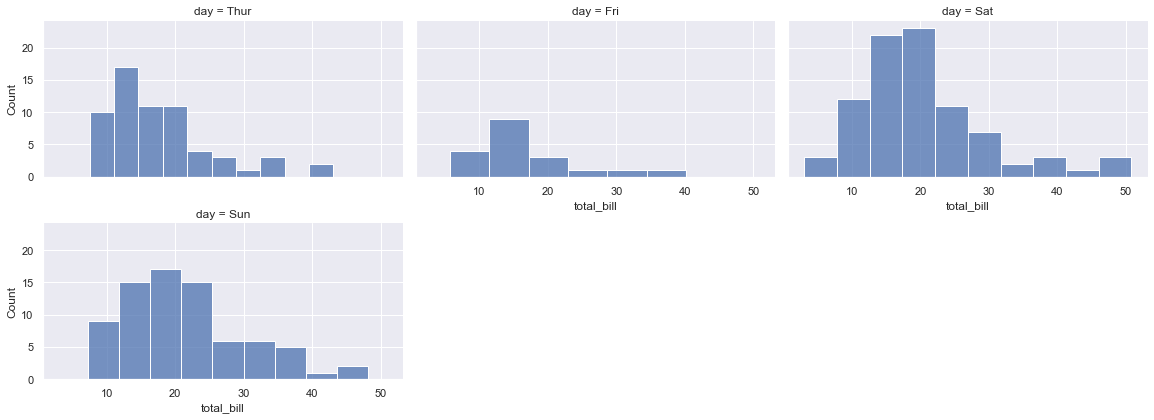

In [15]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="day", height=3, aspect=1.8, col_wrap=3)
g.map(sns.histplot, "total_bill")

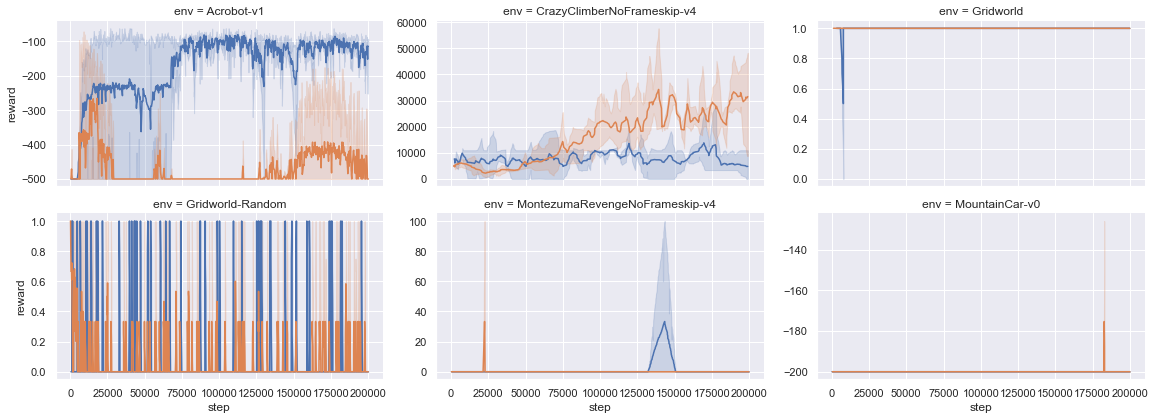

In [32]:
grid = sns.FacetGrid(
    pd.concat(env_dfs.values()),
    col='env', height=3, aspect=1.8, col_wrap=3, sharey=False)

grid.map_dataframe(sns.lineplot, x='step', y='reward', hue='task_agent', ci=95)

In [185]:
baseline_df[baseline_df['env'] == 'CrazyClimberNoFrameskip-v4']

,env,task_agent,run_name,step,reward
0,CrazyClimberNoFrameskip-v4,Rainbow,logical-sweep-36,2556,3700
1,CrazyClimberNoFrameskip-v4,Rainbow,logical-sweep-36,6758,4700
2,CrazyClimberNoFrameskip-v4,Rainbow,logical-sweep-36,12507,3400
3,CrazyClimberNoFrameskip-v4,Rainbow,logical-sweep-36,16369,2200
4,CrazyClimberNoFrameskip-v4,Rainbow,logical-sweep-36,20909,2000
...,...,...,...,...,...
55,CrazyClimberNoFrameskip-v4,Rainbow,sleek-sweep-32,184783,11900
56,CrazyClimberNoFrameskip-v4,Rainbow,sleek-sweep-32,186960,34300
57,CrazyClimberNoFrameskip-v4,Rainbow,sleek-sweep-32,189700,47300
58,CrazyClimberNoFrameskip-v4,Rainbow,sleek-sweep-32,192640,40300


In [187]:
# sns.lineplot(data=baseline_df[baseline_df['env'] == 'CrazyClimberNoFrameskip-v4'], x='step', y='reward', hue='run_name')

ValueError: cannot reindex from a duplicate axis

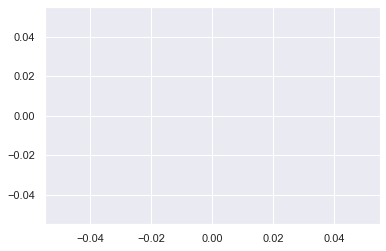

In [172]:
for env, env_data in baseline_df.groupby('env'):
    sns.lineplot(data=baseline_df, x='step', y='reward', hue='task_agent', style='task_agent')

In [154]:
a[1]

,env,task_agent,steps,rewards
6,Acrobot-v1,Rainbow,"{0: 499, 1: 999, 2: 1499, 3: 1999, 4: 2499, 5:...","{0: -500, 1: -500, 2: -500, 3: -500, 4: -500, ..."
7,Acrobot-v1,PPO,"{0: 999, 1: 2499, 2: 2999, 3: 3999, 4: 5881, 5...","{0: -500, 1: -500, 2: -500, 3: -500, 4: -431, ..."
8,Acrobot-v1,Rainbow,"{0: 499, 1: 999, 2: 1499, 3: 1999, 4: 2499, 5:...","{0: -500, 1: -500, 2: -500, 3: -500, 4: -500, ..."
9,Acrobot-v1,PPO,"{0: 499, 1: 2999, 2: 3499, 3: 5499, 4: 7146, 5...","{0: -500, 1: -500, 2: -500, 3: -500, 4: -321, ..."
10,Acrobot-v1,Rainbow,"{0: 499, 1: 913, 2: 1413, 3: 1913, 4: 2413, 5:...","{0: -500, 1: -413, 2: -500, 3: -500, 4: -500, ..."
11,Acrobot-v1,PPO,"{0: 499, 1: 999, 2: 2499, 3: 4499, 4: 4999, 5:...","{0: -500, 1: -500, 2: -500, 3: -500, 4: -500, ..."


In [ ]:
for env in baseline_df['env'].unique

In [74]:
import pandas as pd
import wandb
api = wandb.Api()

run = api.run('ejmejm/rl_representation_learning-sweep_configs/drl5s4k7')

In [130]:
a = run.scan_history(keys=['_step', 'env_task_step', 'env_task_episode_reward'])

In [132]:
a.next()

{'_step': 5161, 'env_task_step': 6758, 'env_task_episode_reward': 4700}

In [133]:
run.history(keys=['env_task_step', 'env_task_episode_reward'])

,_step,env_task_step,env_task_episode_reward
0,958,2556,3700
1,5161,6758,4700
2,10911,12507,3400
3,14774,16369,2200
4,19315,20909,2000
5,24362,25955,3700
6,28623,30215,3400
7,32620,34211,5400
8,36723,38313,4100
9,40445,42034,3500


In [80]:
print(dir(run))


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_attrs',
 '_base_dir',
 '_entity',
 '_exec',
 '_files',
 '_full_history',
 '_repr_html_',
 '_sampled_history',
 '_state',
 '_summary',
 'client',
 'create',
 'delete',
 'dir',
 'display',
 'entity',
 'file',
 'files',
 'history',
 'id',
 'json_config',
 'lastHistoryStep',
 'load',
 'log_artifact',
 'logged_artifacts',
 'name',
 'path',
 'project',
 'save',
 'scan_history',
 'snake_to_camel',
 'state',
 'storage_id',
 'summary',
 'sweep',
 'to_html',
 'update',
 'upload_file',
 'url',
 'use_artifact',
 'used_artifacts',
 'user',
 'username',
 'wait_until_finished']